### Dezembro 2020

In [ ]:
import pandas_datareader as web
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-12-01', end='2021-01-31') 
#df.head()

In [ ]:
dec = df
dec = dec.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
dec.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [ ]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

In [ ]:
# Prever n dias no futuro
predic_day = 30 #7 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [ ]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

In [ ]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

In [ ]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

In [ ]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


In [ ]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])


In [ ]:
x_val #os ultimos 30 valores utilizados para realizar a previsao.

In [ ]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

In [ ]:
temp_df.tail(25)["Prediction"].plot() # valores predidos

In [ ]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

In [ ]:
plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Dezembro 2020: Previsto x Valor Real")
plt.legend()

### Janeiro 2021

In [2]:
import pandas_datareader as web
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-01-01', end='2021-02-28') 
#df.head()

Text(0, 0.5, 'Preco em $ USD')

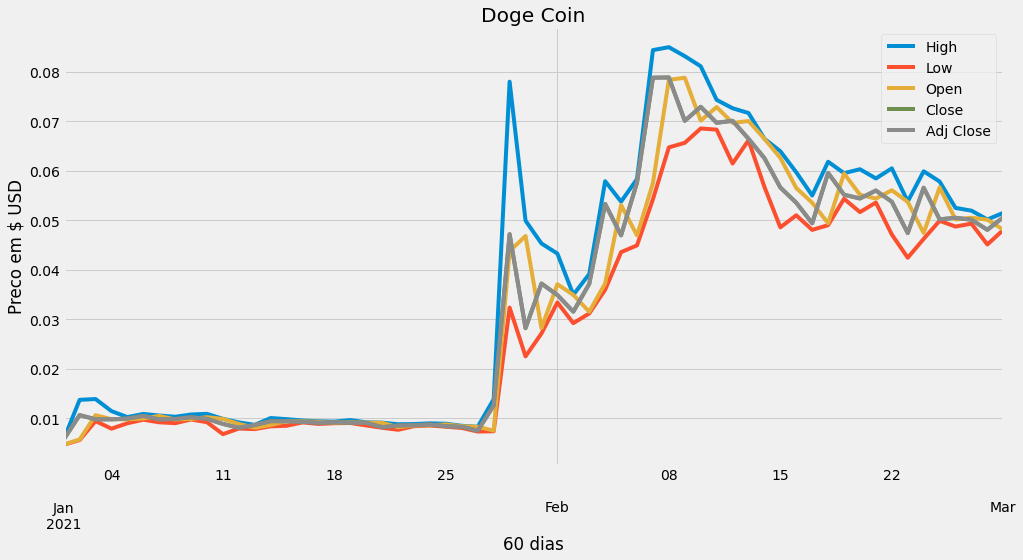

In [5]:
jan = df
jan = jan.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
jan.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [6]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-01-01,0.005685
2021-01-02,0.010615
2021-01-03,0.009771
2021-01-04,0.009767
2021-01-05,0.009920


In [7]:
# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [8]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.005685],
       [0.010615],
       [0.009771],
       [0.009767],
       [0.00992 ],
       [0.010465],
       [0.009742],
       [0.009846],
       [0.010194],
       [0.00986 ],
       [0.008835],
       [0.008063],
       [0.008616],
       [0.009397],
       [0.009369],
       [0.009265],
       [0.009067],
       [0.009171],
       [0.009098],
       [0.00906 ],
       [0.008166],
       [0.008524],
       [0.008579],
       [0.008727],
       [0.008383],
       [0.008255],
       [0.007482],
       [0.012555],
       [0.047162]])

In [9]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.037196, 0.034875, 0.03152 , 0.03712 , 0.053289, 0.046935,
       0.057595, 0.078782, 0.078825, 0.07007 , 0.072896, 0.069676,
       0.070069, 0.06645 , 0.062537, 0.056591, 0.05352 , 0.049376,
       0.059541, 0.055139, 0.054384, 0.05598 , 0.053725, 0.047392,
       0.056555, 0.050167, 0.05048 , 0.050083, 0.048052])

In [10]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [11]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.15228183871487


In [12]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.053289  0.047392  0.046935  0.054384  0.046935  0.0615205]

Os valores reais para Doge Coin sao: [0.078782 0.072896 0.078825 0.050167 0.034875 0.062537]


In [13]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])


In [14]:
x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.005685000214725733,
 0.010614999569952488,
 0.009770999662578106,
 0.009766999632120132,
 0.009920000098645687,
 0.010464999824762344,
 0.00974200014024973,
 0.009846000000834465,
 0.010193999856710434,
 0.009859999641776085,
 0.008834999985992908,
 0.008062999695539474,
 0.008616000413894653,
 0.009397000074386597,
 0.009368999861180782,
 0.009265000000596046,
 0.009066999889910221,
 0.009170999750494957,
 0.009097999893128872,
 0.009060000069439411,
 0.008166000247001648,
 0.008523999713361263,
 0.008578999899327755,
 0.008727000094950199,
 0.008383000269532204,
 0.008255000226199627,
 0.007482000160962343,
 0.012555000372231007,
 0.047162000089883804,
 0.028176000341773033]

In [15]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.069676]
Previsto: [0.046935]
Previsto: [0.03432]
Previsto: [0.03712]
Previsto: [0.053289]
Previsto: [0.046935]
Previsto: [0.0473575]
Previsto: [0.053289]
Previsto: [0.046935]
Previsto: [0.053289]
Previsto: [0.047392]
Previsto: [0.069676]
Previsto: [0.070069]
Previsto: [0.0615205]
Previsto: [0.0615205]
Previsto: [0.0529835]
Previsto: [0.0543295]
Previsto: [0.049376]
Previsto: [0.0543295]
Previsto: [0.055139]
Previsto: [0.054384]
Previsto: [0.0548525]
Previsto: [0.053725]
Previsto: [0.047392]
Previsto: [0.056555]
Previsto: [0.054384]
Previsto: [0.069676]
Previsto: [0.048509]
Previsto: [0.048052]
Previsto: [0.048509]
----------
Preco Anterior Date
2021-01-01    0.037196
2021-01-02    0.034875
2021-01-03    0.031520
2021-01-04    0.037120
2021-01-05    0.053289
2021-01-06    0.046935
2021-01-07    0.057595
2021-01-08    0.078782
2021-01-09    0.078825
2021-01-10    0.070070
2021-01-11    0.072896
2021-01-12    0.069676
2021-01-13    0.070069
2021-01-14    0.066450
2021-01-15  

<AxesSubplot:xlabel='Date'>

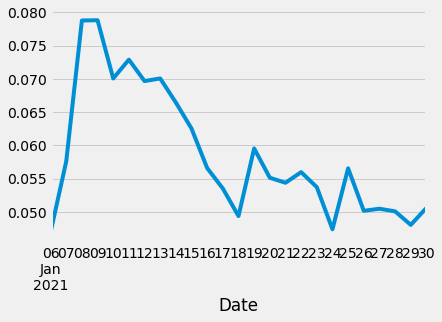

In [16]:
temp_df.tail(25)["Prediction"].plot() # valores predidos

In [17]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

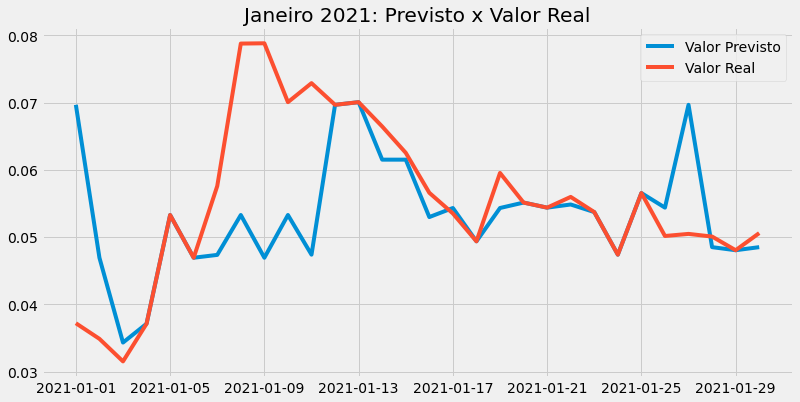

In [19]:
plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Janeiro 2021: Previsto x Valor Real")
plt.legend()

### Fevereiro 2021

In [ ]:
import pandas_datareader as web
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-12-01', end='2021-01-31') 
#df.head()

Text(0, 0.5, 'Preco em $ USD')

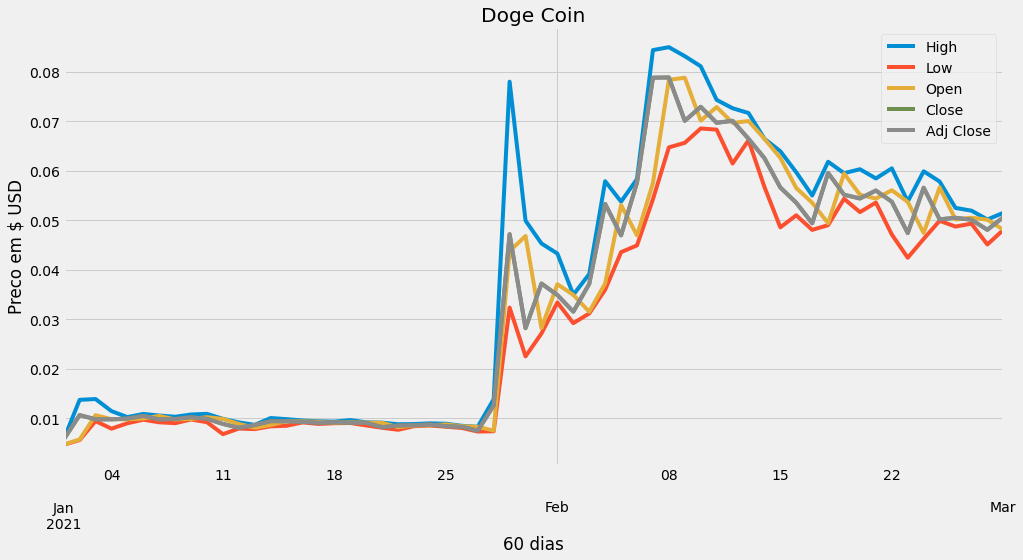

In [21]:
feb = df
feb = feb.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
feb.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [ ]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

In [ ]:
# Prever n dias no futuro
predic_day = 30 #7 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [ ]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

In [ ]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

In [ ]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

In [ ]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


In [ ]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])


In [ ]:
x_val #os ultimos 30 valores utilizados para realizar a previsao.

In [ ]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

In [ ]:
temp_df.tail(25)["Prediction"].plot() # valores predidos

In [ ]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

In [ ]:
plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Dezembro 2020: Previsto x Valor Real")
plt.legend()